In [1]:
!pip install opencv-python

In [2]:
!pip install keras
!pip install tensorflow
!pip install tensorflow_hub

In [3]:
import cv2
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize
import matplotlib.pyplot as plt
from scipy import ndimage as nd
from scipy import misc
from scipy.ndimage import laplace
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
import tensorflow_hub as hub
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
dataset = []
label = []

img_dir = './dataset/'

In [5]:
no_tumor_img = os.listdir(img_dir + 'no/')
for i, img_name in enumerate(no_tumor_img):
    if(img_name.split('.')[1] == 'jpg'):
        img=cv2.imread(img_dir+'no/'+img_name)
        img = Image.fromarray(img,'RGB')
        img=img.resize((128,128))
        img = nd.gaussian_filter(img,sigma = 1)
        img=laplace(img)
        dataset.append(np.array(img))
        label.append(0)

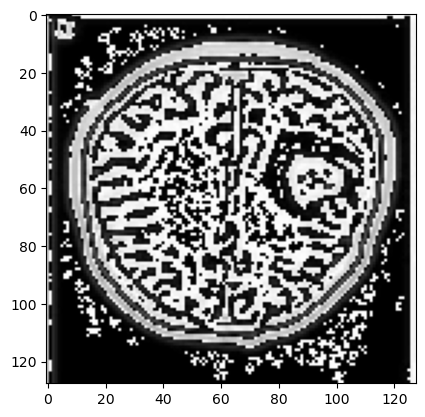

In [6]:
yes_tumor_img = os.listdir(img_dir + 'yes/')
for i, img_name in enumerate(yes_tumor_img):
    if(img_name.split('.')[1] == 'jpg'):
        img=cv2.imread(img_dir+'yes/'+img_name)
        img = Image.fromarray(img,'RGB')
        img=img.resize((128,128))
        img = nd.gaussian_filter(img,sigma = 1)
        img=laplace(img)
        plt.imshow(img)
        dataset.append(np.array(img))
        label.append(1)

In [7]:
dataset = np.array(dataset)
label = np.array(label)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(dataset,label,test_size=0.2,random_state=0)
y_train.shape

(2400,)

In [9]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
!pip show tensorflow
!pip show tensorflow_hub


Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/lalit/anaconda3/lib/python3.11/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tf_keras
Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/lalit/anaconda3/lib/python3.11/site-packages
Requires: numpy, protobuf, tf-keras
Required-by: 


In [12]:
!pip install --upgrade tensorflow tensorflow-hub


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/26/08/556c4159675c1a30e077ec2a942eeeb81b457cc35c247a5b4a59a1274f05/tensorflow-2.18.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.18.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Obtaining dependency information for tensorboard<2.19,>=2.18 from https://files.pythonhosted.org/packages/b1/de/021c1d407befb505791764ad2cbd56ceaaa53a746baed01d2e2143f05f18/tensorboard-2.18.0-py3-none-any.whl.metadata
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Obtaining dependency information for numpy<2.1.0,>=1.26.0 from https://files.pythonhosted.org/packages/c1/ca/2f384720020c7b244d22508cb7ab23d95f179fcfff33c31a6eeba8d6c512/numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)


In [13]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [14]:
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [15]:
from tensorflow.keras.layers import Lambda

effnet_layer = Lambda(lambda x: effnet_layer(x))


In [16]:
import tensorflow as tf
import tensorflow_hub as hub

print(tf.__version__)  
print(hub.__version__)  


2.17.1
0.16.1


# EfficientNetB0

In [17]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda


effnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

effnet_layer = hub.KerasLayer(effnet_url, trainable=False)

effnet_layer_wrapped = Lambda(lambda x: effnet_layer(x))

effnet_model = Sequential([
    effnet_layer_wrapped,  
    Dense(1, activation="sigmoid")  
])


effnet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
effnet_history = effnet_model.fit(x_train,y_train,batch_size=16, verbose = 1, epochs = 30, validation_data=(x_test,y_test), shuffle=False)


Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.6384 - loss: 0.6362 - val_accuracy: 0.7833 - val_loss: 0.4946
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.7953 - loss: 0.4692 - val_accuracy: 0.8200 - val_loss: 0.4333
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.8333 - loss: 0.4087 - val_accuracy: 0.8317 - val_loss: 0.3993
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.8546 - loss: 0.3711 - val_accuracy: 0.8417 - val_loss: 0.3764
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.8709 - loss: 0.3443 - val_accuracy: 0.8517 - val_loss: 0.3595
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.8818 - loss: 0.3237 - val_accuracy: 0.8550 - val_loss: 0.3461
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.8870 - loss: 0.3071 - val_accuracy: 0.8533 - val_loss: 0.3351
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.8908 - loss: 0.2933 - 

In [18]:
answer = effnet_model.predict(x_test)
answer = answer.flatten()

y_predNet = np.where(answer > 0.5, 1, 0)

print(confusion_matrix(y_test, y_predNet))
print(accuracy_score(y_test, y_predNet))

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step
[[318  25]
 [ 29 228]]
0.91


In [19]:
def plot_curves(history):

    """
    Returns separate loss and accuracy curves
    """
    import matplotlib.pyplot as plt

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

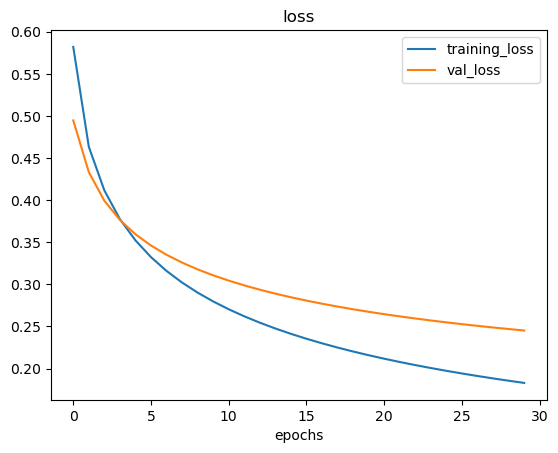

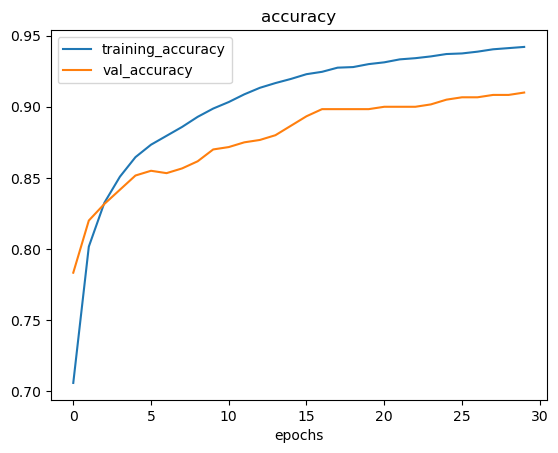

In [20]:
plot_curves(effnet_history)

In [21]:
import itertools

In [22]:
res = effnet_model.evaluate(x_test,y_test, verbose=0)
print(f"Accuracy on Evaluation: {res[1]*100:.2f}%\nLoss: {res[0]:.4f}")

Accuracy on Evaluation: 91.00%
Loss: 0.2452


In [23]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix , With out normalization')
        
    thres=cm.max()/2
    for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]> thres else 'black')
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Model accuracy (in %): 91.0
Confusion Matrix , With out normalization


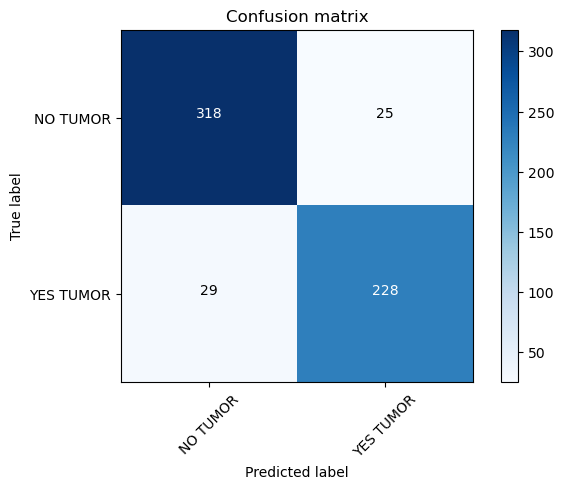

In [24]:
score=accuracy_score(y_test,y_predNet)
print("Model accuracy (in %):", score*100)
cm=confusion_matrix(y_test,y_predNet)
plot_confusion_matrix(cm,classes=['NO TUMOR','YES TUMOR'])

In [25]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


/Users/lalit/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.5635 - loss: 0.6871 - val_accuracy: 0.7150 - val_loss: 0.5739
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - accuracy: 0.7608 - loss: 0.5464 - val_accuracy: 0.7283 - val_loss: 0.5346
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 216ms/step - accuracy: 0.7967 - loss: 0.4794 - val_accuracy: 0.7800 - val_loss: 0.4202
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.8365 - loss: 0.3645 - val_accuracy: 0.8600 - val_loss: 0.2862
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - accuracy: 0.9302 - loss: 0.1972 - val_accuracy: 0.9117 - val_loss: 0.2017
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.9605 - loss: 0.1340 - val_accuracy: 0.9367 - val_loss: 0.1656
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.9747 - loss: 0.0781 - val_accuracy: 0.9450 - val_loss: 0.1447
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 226ms/step - accuracy: 0.9822 - loss: 0.0545 - val_accu

In [26]:
# Evaluate the model on test data
res = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {res[1]*100:.2f}%\nTest Loss: {res[0]:.4f}")


Test Accuracy: 95.33%
Test Loss: 0.1426


In [27]:
import keras
print(keras.__version__)


3.7.0


In [28]:
# Predict on test data
y_pred = cnn_model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary output


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


Confusion Matrix:
 [[330  13]
 [ 15 242]]
Confusion Matrix , With out normalization


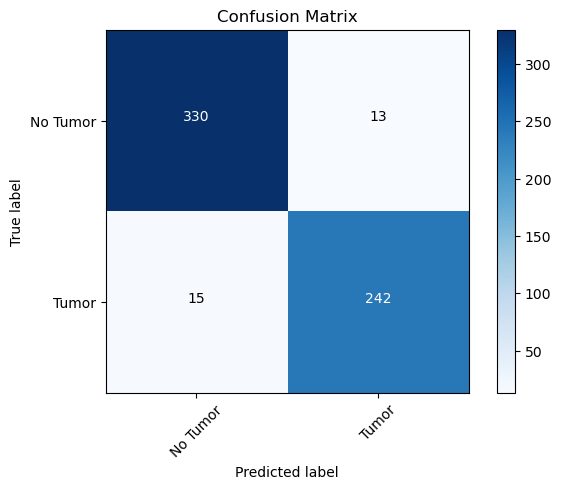

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plot_confusion_matrix(cm, classes=['No Tumor', 'Tumor'], title='Confusion Matrix')


In [30]:
import os

img_path = "/Users/lalit/Desktop/Brain_Tumor_Detection/dataset/yes/y6.jpg"  
if os.path.exists(img_path):
    print("Path is correct, file exists.")
else:
    print("File not found. Check the path.")


Path is correct, file exists.


In [31]:
def predict_image(model, img_path):
    """
    Predicts whether the given image is Tumorous or Non-Tumorous.
    
    Parameters:
    model: Trained model (EfficientNet or CNN)
    img_path: Path to the image file
    
    Returns:
    Prediction result: "Tumorous" or "Non-Tumorous"
    """
    import cv2
    from PIL import Image
    import numpy as np
    from scipy.ndimage import gaussian_filter, laplace
    from keras.utils import normalize

    # Check if file exists
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"File not found: {img_path}")

    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Image at '{img_path}' could not be loaded. Check the file format.")

    # Preprocess the image
    img = Image.fromarray(img, 'RGB')
    img = img.resize((128, 128))  # Resize to match training dimensions
    img = np.array(img)
    img = gaussian_filter(img, sigma=1)  # Apply Gaussian filter
    img = laplace(img)  # Apply Laplace filter
    img = img / 255.0  # Normalize the image

    # Add batch dimension
    img = np.expand_dims(img, axis=0)

    # Predict using the model
    prediction = model.predict(img)
    result = "Tumorous" if prediction[0][0] > 0.5 else "Non-Tumorous"

    print(f"Prediction: {result} (Probability: {prediction[0][0]:.2f})")
    return result

# Example usage
img_path = '/Users/lalit/Desktop/Brain_Tumor_Detection/dataset/yes/y6.jpg'  # Replace with the actual path to your test image
result = predict_image(effnet_model, img_path)  # Replace effnet_model with cnn_model for CNN
print(f"The image '{img_path}' is classified as: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Tumorous (Probability: 0.99)
The image '/Users/lalit/Desktop/Brain_Tumor_Detection/dataset/yes/y6.jpg' is classified as: Tumorous
